# Linear Regression in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### What is linear regression?
Suppose we have a data set with some $\bf{y}$ variable and some $\bf{x}$ variable.
* The $\bf{x}$ variable can represent one column of data in your table or multiple columns. 
* The $\bf{x}$ variable is referred to as the *feature*, *explanatory* or *independent* variable.
* The $\bf{y}$ variable is referred to as the *target*, *response* or *dependent* variable.  

There are a lot of different terms which denote an $\bf{x}$ and a $\bf{y}$ term depending on what field you're in.  
What we care about is the relationship between $\bf{x}$ and $\bf{y}$.

In general, we want to know if $\bf{x}$ and $\bf{y}$ correlate with one another.  Note that this $\bf{does{\ }not}$ imply causation.  When the value of $\bf{x}$ changes, how does the value of $\bf{y}$ change and how *sure* are the stats that $\bf{x}$ and $\bf{y}$ are related in this way?  We want to determine some function such that $\bf{y}$ = f($\bf{x}$).  

The simplest approach to this would be to say that $\bf{y}$ = mean($\bf{y}$).  That is, for all values of $\bf{x}$, we assign $\bf{y}$ the mean value.  
Doing so looks something like the graph that follows.

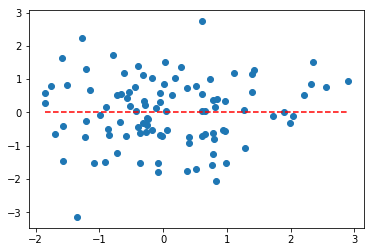

In [2]:
#Generate random x and y variables
x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
#Plot a scatter plot of x,y and the line representing the mean
fig, ax = plt.subplots(1,1)
ax.scatter(x,y)
ax.plot([min(x), max(x)], [np.mean(y), np.mean(y)], 'r--')
plt.show()

The above graph shows a way to describe $\bf{y}$ with respect to $\bf{x}$; however, we completely miss out on the information contained in $\bf{x}$ with such a simple model.  Keeping it simple but also taking advantage of the information contained in $\bf{x}$, it makes sense to draw a line through the data points with varying slope and intercept.  

In other words, we can rotate the line and move (translate) the line respectively.  To find this line, we want to determine, or *learn*, two values, m and b, such that $\bf{y}$ = m$\bf{x}$ + b within some margin of error.

Below shows a line drawn with the specified m and b values.  The data are generated to follow a line of $\bf{y}$ = 2$\bf{x}$ + 1.  Change the values of m and b to see how the line changes.  What line best fits these data?

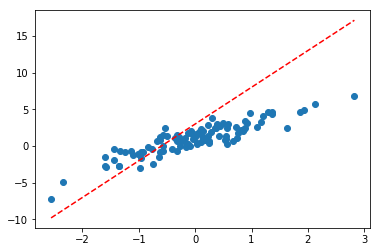

In [3]:
m = 5
b = 3

x = np.random.standard_normal(100)
y = 2 * x + 1 + np.random.standard_normal(100)

fig, ax = plt.subplots(1,1)
ax.scatter(x,y)
ax.plot([min(x), max(x)], [m*min(x)+b, m*max(x)+b], 'r--')
plt.show()

### How to gauge model performance

Once our model is created, how can we gauge how well this model works?  The most popular metric to determine how well a linear regression model fits the data is the $R^2$ value.  The value $R^2$ relates to the correlation of $\bf{x}$ and $\bf{y}$.  The $R^2$ coefficient, or coefficient of determination, gives us an idea of how well the model improves upon just taking the mean of $\bf{y}$ as seen above.  The $R^2$ calculation is as follows
* Total sum of squares: $SS_{tot}$ = $\sum_{i=1}^n (y_i - \bar{y})^2$
$${\ }$$
* Explained sum of squares: $SS_{reg}$ = $\sum_{i=1}^n (mx_i + b - \bar{y})^2$
$${\ }$$
* Residual sum of squares: $SS_{res}$ = $\sum_{i=1}^n (mx_i + b - y_i)^2$

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

The total sum of squares measures how far each y value deviates from the mean of all of the y's.  The explained sum of squares shows how much a linear model improves on the original model where only the mean of $\bf{y}$ is used.  The residual sum of squares measures the error of our linear model.  

An alternative approach is to use the Mean Squared Error (MSE) or the Root Mean Squared Error (RMSE) which can be used for models other than linear regression models.

* Mean Squared Error: MSE = $\sum_{i=1}^n \left[y_i - (mx_i + b) \right]^2$
$${\ }$$
* Root Mean Squared Error: RMSE = $\sqrt{MSE}$

### Generate Data
First, we need some data to work with.  To generate the data we use numpy's random library

Linear regression assumes the data are normally distributed.  Below we generate data
such that $\bf{x}$ is sampled from the standard normal (mean 0, variance 1)
* Generate data so $\bf{x}$ ~ N(0, 1), $\bf{y}$ ~ N(m$\bf{x}$ + b, 1)
* The mean of the $\bf{x}$ distribution is 0 with variance 1
* The mean of the $\bf{y}$ distribution is m$\bf{x}$ + b with variance 1

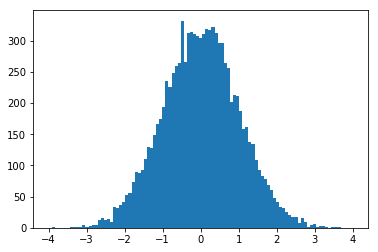

In [4]:
plt.hist(np.random.standard_normal(10000), bins = np.linspace(-4,4, 100))
plt.show()

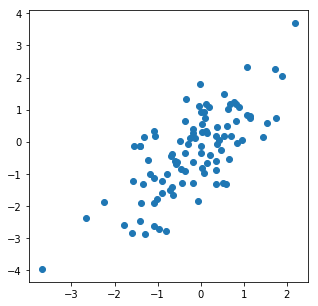

In [5]:
def generate_data(n, m = 1, b=0):
    """
    Parameters
    ----------
    n     :    integer, number of points to generate
    m     :    float, slope of the line
    b     :    float, intercept of the line
    
    Returns
    -------
    numpy arrays of x and y values normally distributed around the specified line
    """
    #generate random x values
    x = np.random.standard_normal(n)
    y = m *x + b + np.random.standard_normal(n)
    return x, y

def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(x,y)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x,y)
        return ax
    
def calculate_r2(y, y_pred):
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_res = np.sum((y_pred - y)**2)
    return 1 - ss_res / ss_tot
    
x, y = generate_data(100)
ax = plot_xy(x,y)
plt.show()

In [6]:
x, y = generate_data(100, m = 2, b = 1)

### Linear regression with sklearn

In [7]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [8]:
%%time
lm = linear_model.LinearRegression()
lm.fit(x.reshape(-1,1),y)
m, b = lm.coef_[0], lm.intercept_

print('m:', m,' b:', b, '\n')

print("Mean squared error: %.2f"
      % np.mean((lm.predict(x.reshape(-1,1)) - y) ** 2))
print("R2 from custom function: %.4f"
      % calculate_r2(y, m*x+b))
print("R2 from sklearn: %.4f"
      % r2_score(y, m*x+b))

('m:', 2.0379050332189599, ' b:', 1.1126070560620831, '\n')
Mean squared error: 1.18
R2 from custom function: 0.8058
R2 from sklearn: 0.8058
Wall time: 1e+03 µs


### Linear regression with numpy
First using a *Vandermonde* matrix, the second using a vector of x values and y values.  The *Vandermonde* matrix requires we specify the intercept variable as a column of 1's.

In [ ]:
import numpy as np

In [9]:
%%time
A = np.vstack([x, np.ones(len(x))]).T
lm = np.linalg.lstsq(A,y)
[m, b] = lm[0]

print('m:', m,' b:', b, '\n')
print("Mean squared error: %.2f"
      % np.mean((x*m + b - y) ** 2))
print("R2 from custom function: %.4f"
      % calculate_r2(y, m*x+b))
print("R2 from sklearn: %.4f"
      % r2_score(y, m*x+b))

('m:', 2.0379050332189621, ' b:', 1.1126070560620835, '\n')
Mean squared error: 1.18
R2 from custom function: 0.8058
R2 from sklearn: 0.8058
Wall time: 1 ms


In [18]:
%%time
[m_1, m_2, b] = np.polyfit(x,y,2)

print('m:', m_1, m_2,' b:', b, '\n')
print("Mean squared error: %.2f"
      % np.mean((x*m + b - y) ** 2))
print("R2 from custom function: %.4f"
      % calculate_r2(y, m*x+b))
print("R2 from sklearn: %.4f"
      % r2_score(y, m*x+b))

('m:', -0.057173025839896488, 2.0507038062841314, ' b:', 1.1794142123634859, '\n')
Mean squared error: 1.19
R2 from custom function: 0.8051
R2 from sklearn: 0.8051
Wall time: 2 ms


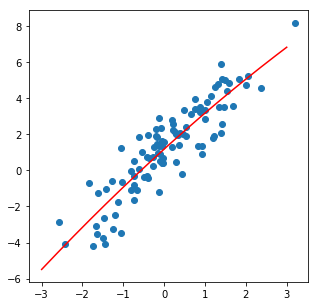

In [22]:
x_line = np.linspace(-3,3,1000)
ax = plot_xy(x,y)
ax.plot(x_line, b + m_2*x_line + m_1*x_line**2, 'r')
plt.show()

### Linear regression with pandas

In [11]:
#Requires statsmodels package
from pandas.stats.api import ols
df = pd.DataFrame({"Y": y, "X": x})
lm = ols(y=df['Y'], x=df['X'])
print(lm)

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         100
Number of Degrees of Freedom:   2

R-squared:         0.8058
Adj R-squared:     0.8038

Rmse:              1.0977

F-stat (1, 98):   406.6119, p-value:     0.0000

Degrees of Freedom: model 1, resid 98

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     2.0379     0.1011      20.16     0.0000     1.8398     2.2360
     intercept     1.1126     0.1100      10.11     0.0000     0.8969     1.3283
---------------------------------End of Summary---------------------------------



### Linear regression with stats model OLS

In [13]:
import statsmodels.formula.api as statsmodels
df = pd.DataFrame({"X": x, "Y": y})
lm = statsmodels.ols(formula="Y ~ X", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     406.6
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           1.19e-36
Time:                        15:11:43   Log-Likelihood:                -150.21
No. Observations:                 100   AIC:                             304.4
Df Residuals:                      98   BIC:                             309.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1126      0.110     10.111      0.0

### Plotting trend lines

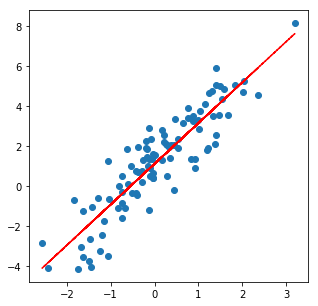

In [14]:
#Plot for all x values, not as robust with respect to line formatting - lazy way
ax = plot_xy(x,y)
ax.plot(x, m*x+b, 'r--')
plt.show()

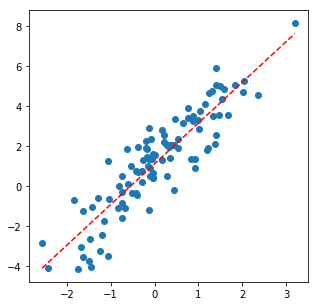

In [15]:
#Plot using only the end points of the line.  Allows for line customization
ax = plot_xy(x,y)
ax.plot([min(x), max(x)], [m*min(x)+b, m*max(x) + b], 'r--')
plt.show()

### Warnings when using linear regression
* $R^2$ is a biased estimator, $R_{adj}^2$, called the adjusted $R^2$, is unbiased.   
* $R^2$ is not everything.  What are the social implications of reporting your findings?  Is your trend serrendipitous?
$${\ }$$
* Not all data is meant for linear regression.  Linear regression has four key assumptions:
    * The means of the $y_i$'s associated with a respective $x_i$ are a linear function of $\bf{x}$
    * The errors of each prediction are independent
    * The errors of each prediction at their repsective $x_i$ are normally distributed
    * The errors of each prediction at their respective $x_i$ have equal variances.
$${\ }$$   
* Correlation $\bf{DOES{\ }NOT}$ imply causation.  However, correlation can be used to make an argument for causation.  For one example, Granger Causality